In [5]:
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

## Część 1

In [2]:
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 2410

In [3]:
XY,C  = datasets.make_classification(n_features=2,n_clusters_per_class=1,n_redundant=0,n_samples=samples, random_state=seed,  )

In [4]:
from sklearn.model_selection import train_test_split
XY_train, XY_test, C_train, C_test = train_test_split(XY, C, test_size=0.2, random_state=0)


In [5]:
# C_train = np.where(C_train==0, -1, C_train) 
# C_test = np.where(C_test==0, -1, C_test) 

In [6]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))


XY_train = norm(XY_train)
XY_test = norm(XY_test)
C_train = norm(C_train)
C_test = norm(C_test)

### sklearn

In [7]:
#sklearn
sk_time = time.time()
for i in range(time_multiplicator):
    sk_ridge_ans= linear_model.RidgeClassifier(alpha=2e-16).fit(XY_train,C_train)
sk_time = (time.time() - sk_time)/time_multiplicator 


In [8]:
sk_pred = sk_ridge_ans.predict(XY_test)

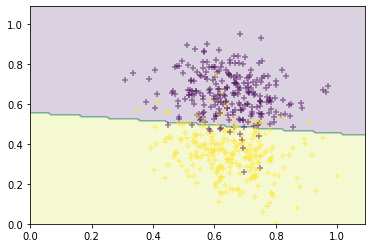

In [9]:
mesh = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))[0]

predict = sk_ridge_ans.predict(np.c_[mesh.ravel(), mesh.T.ravel()]).reshape(mesh.shape)

plt.contourf(mesh, mesh.T, predict, alpha=0.2)
#plt.scatter(XY_train[:, 0], XY_train[:, 1], c=C_train, marker="+", alpha=0.5)
plt.scatter(XY_test[:, 0], XY_test[:, 1], c=C_test+1, marker="+", alpha=0.5)

### Własna implementacja

In [10]:
#analityczna
def my_ridge(XY, C, k): 
    return np.linalg.pinv(XY.T @ XY + k * np.identity(len(XY.T))) @ XY.T @ C


In [11]:
my_time = time.time()
for i in range(time_multiplicator):
    my_ridge_ans = my_ridge(XY_train, C_train, 1e-100)
my_time = (time.time() - my_time)/time_multiplicator 


In [12]:
def my_prediction(theta, XY):
    Y_pred = XY @ theta
    mean = np.mean(Y_pred)
    
    ans = []
    
    for x in Y_pred:
        if x >= mean:
            ans.append(1.0)
        else:
            ans.append(0.0)
    
    return np.asarray(ans)

In [13]:
my_pred = my_prediction(my_ridge_ans, XY_test)
my_pred_print = my_prediction(my_ridge_ans, np.c_[mesh.ravel(), mesh.T.ravel()]).reshape(mesh.shape)

### Porównanie

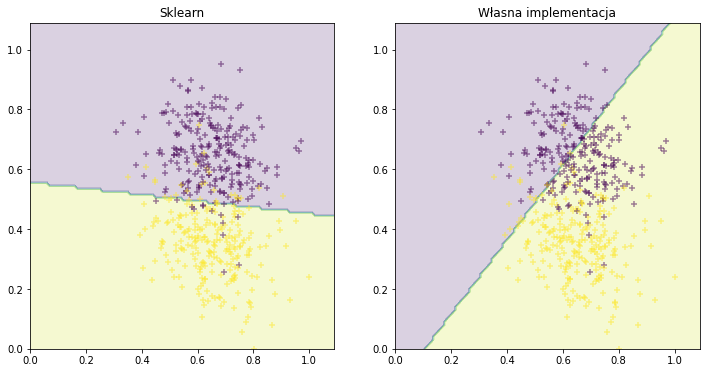

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))

ax1.set_title("Sklearn")
ax1.contourf(mesh, mesh.T, predict, alpha=0.2)
ax1.scatter(XY_test[:, 0], XY_test[:, 1], c=C_test+1, marker="+", alpha=0.5)

ax2.set_title("Własna implementacja")
ax2.contourf(mesh, mesh.T, my_pred_print, alpha=0.2)
ax2.scatter(XY_test[:, 0], XY_test[:, 1], c=C_test+1, marker="+", alpha=0.5)

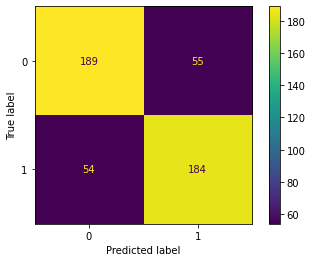

In [15]:
my_cm = metrics.confusion_matrix(C_test, my_pred)
my_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=my_cm)
my_disp.plot()

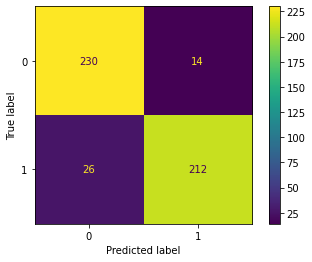

In [16]:
sk_cm = metrics.confusion_matrix(C_test, sk_pred)
sk_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=sk_cm)
sk_disp.plot()

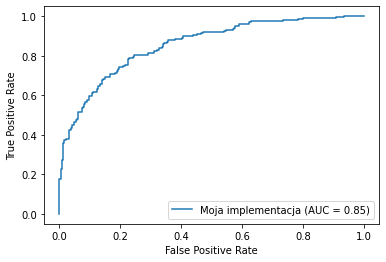

In [17]:

fpr, tpr, thresholds = metrics.roc_curve(C_test, XY_test @ my_ridge_ans)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Moja implementacja')
display.plot()

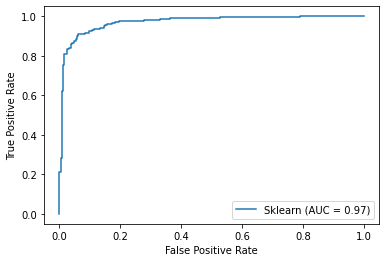

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(C_test, sk_ridge_ans.decision_function(XY_test))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Sklearn')
display.plot()

In [19]:
print("Sklearn czułość: ",sk_cm[0][0]/(sk_cm[0][0]+sk_cm[1][0]))
print("Wlasny  czułość: ",my_cm[0][0]/(my_cm[0][0]+my_cm[1][0]))
print()
print("Sklearn specyficzność: ",sk_cm[1][1]/(sk_cm[0][0]+sk_cm[1][1]))
print("Wlasny  specyficzność: ",my_cm[1][1]/(my_cm[0][0]+my_cm[1][1]))
print()
print("Sklearn skuteczność: ",metrics.accuracy_score(sk_pred, C_test))
print("Wlasny  skuteczność: ",metrics.accuracy_score(my_pred, C_test))
print()
print("Sklearn czas: {:f}".format(sk_time))
print("Wlasny  czas: {:f}".format(my_time))

Sklearn czułość:  0.8984375
Wlasny  czułość:  0.7777777777777778

Sklearn specyficzność:  0.4796380090497738
Wlasny  specyficzność:  0.4932975871313673

Sklearn skuteczność:  0.91701244813278
Wlasny  skuteczność:  0.7738589211618258

Sklearn czas: 0.001220
Wlasny  czas: 0.000080


## Część 2

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

cleveland = pd.read_csv('processed.cleveland.data', header=None, names=
                        ["age","sex","cp","trestbps","chol","fbs","restecg",
                         "thalach","exang","oldpeak","slope","ca","thal","num"])
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')

print("ilość brakujących wartości: ",cleveland.isnull().sum(axis = 0).sum())
print(cleveland.isnull().sum(axis = 0))

ilość brakujących wartości:  6
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [2]:
cleveland = cleveland.dropna()

In [3]:
#zmienna przewidywana jako wartości binarne
cleveland.loc[cleveland['num'] > 0,'num'] = 1
cleveland.loc[cleveland['num'] == 0, 'num'] = -1
cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,-1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,-1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [23]:
#cleveland.describe()

In [24]:
# na podstawie heart-disease.name
# 3  (age)      ciągła      
# 4  (sex)      kategoryczna 
# 9  (cp)       kategoryczna 
# 10 (trestbps) ciągła
# 12 (chol)     ciągła
# 16 (fbs)      kategoryczna
# 19 (restecg)  kategoryczna
# 32 (thalach)  ciągła
# 38 (exang)    kategoryczna
# 40 (oldpeak)  dyskretna
# 41 (slope)    kategoryczna
# 44 (ca)       kategoryczna
# 51 (thal)     kategoryczna
# 58 (num)      kategoryczna

In [25]:
stat_zdr = pd.Series({
    'age_mean':cleveland.query("num == -1")['age'].mean(),
    'age_min':cleveland.query("num == -1")['age'].min(),
    'age_max':cleveland.query("num == -1")['age'].max(),
    'age_std':cleveland.query("num == -1")['age'].std(),
    
    'sex_dom':cleveland.query("num == -1")['sex'].mode()[0],
    
    'cp_dom':cleveland.query("num == -1")['cp'].mode()[0],
    
    'trestbps_mean':cleveland.query("num == -1")['trestbps'].mean(),
    'trestbps_min':cleveland.query("num == -1")['trestbps'].min(),
    'trestbps_max':cleveland.query("num == -1")['trestbps'].max(),
    'trestbps_std':cleveland.query("num == -1")['trestbps'].std(),
    
    'chol_mean':cleveland.query("num == -1")['chol'].mean(),
    'chol_min':cleveland.query("num == -1")['chol'].min(),
    'chol_max':cleveland.query("num == -1")['chol'].max(),
    'chol_std':cleveland.query("num == -1")['chol'].std(),
    
    'fbs_dom':cleveland.query("num == -1")['fbs'].mode()[0],
    
    'restecg_dom':cleveland.query("num == -1")['restecg'].mode()[0],
        
    'thalach_mean':cleveland.query("num == -1")['thalach'].mean(),
    'thalach_min':cleveland.query("num == -1")['thalach'].min(),
    'thalach_max':cleveland.query("num == -1")['thalach'].max(),
    'thalach_std':cleveland.query("num == -1")['thalach'].std(),
    
    'exang_dom':cleveland.query("num == -1")['exang'].mode()[0],
    
    'oldpeak_dom':cleveland.query("num == -1")['oldpeak'].mode()[0],
    'oldpeak_mean':cleveland.query("num == -1")['oldpeak'].mean(),
    
    'slope_dom':cleveland.query("num == -1")['slope'].mode()[0],
    
    'ca_dom':cleveland.query("num == -1")['ca'].mode()[0],
    
    'thal_dom':cleveland.query("num == -1")['thal'].mode()[0],
    
    'num_dom':cleveland.query("num == -1")['num'].mode()[0],
})



In [26]:
stat_chr = pd.Series({
    'age_mean':cleveland.query("num == 1")['age'].mean(),
    'age_min':cleveland.query("num == 1")['age'].min(),
    'age_max':cleveland.query("num == 1")['age'].max(),
    'age_std':cleveland.query("num == 1")['age'].std(),
    
    'sex_dom':cleveland.query("num == 1")['sex'].mode()[0],
    
    'cp_dom':cleveland.query("num == 1")['cp'].mode()[0],
    
    'trestbps_mean':cleveland.query("num == 1")['trestbps'].mean(),
    'trestbps_min':cleveland.query("num == 1")['trestbps'].min(),
    'trestbps_max':cleveland.query("num == 1")['trestbps'].max(),
    'trestbps_std':cleveland.query("num == 1")['trestbps'].std(),
    
    'chol_mean':cleveland.query("num == 1")['chol'].mean(),
    'chol_min':cleveland.query("num == 1")['chol'].min(),
    'chol_max':cleveland.query("num == 1")['chol'].max(),
    'chol_std':cleveland.query("num == 1")['chol'].std(),
    
    'fbs_dom':cleveland.query("num == 1")['fbs'].mode()[0],
    
    'restecg_dom':cleveland.query("num == 1")['restecg'].mode()[0],
        
    'thalach_mean':cleveland.query("num == 1")['thalach'].mean(),
    'thalach_min':cleveland.query("num == 1")['thalach'].min(),
    'thalach_max':cleveland.query("num == 1")['thalach'].max(),
    'thalach_std':cleveland.query("num == 1")['thalach'].std(),
    
    'exang_dom':cleveland.query("num == 1")['exang'].mode()[0],
    
    'oldpeak_dom':cleveland.query("num == 1")['oldpeak'].mode()[0],
    'oldpeak_mean':cleveland.query("num == 1")['oldpeak'].mean(),
    
    'slope_dom':cleveland.query("num == 1")['slope'].mode()[0],
    
    'ca_dom':cleveland.query("num == 1")['ca'].mode()[0],
    
    'thal_dom':cleveland.query("num == 1")['thal'].mode()[0],
    
    'num_dom':cleveland.query("num == 1")['num'].mode()[0],
})

In [27]:
data = pd.DataFrame({'chory':stat_chr,'zdrowy':stat_zdr})
data

,chory,zdrowy
age_mean,56.759124,52.643750
age_min,35.000000,29.000000
age_max,77.000000,76.000000
age_std,7.899670,9.551151
sex_dom,1.000000,1.000000
cp_dom,4.000000,3.000000
trestbps_mean,134.635036,129.175000
trestbps_min,100.000000,94.000000
trestbps_max,200.000000,180.000000
trestbps_std,18.896730,16.373990


In [41]:
# klasa = 'age'

# plt.hist(cleveland.query("num == 1")[klasa].to_numpy(), color='r',alpha=0.5,label="chory", )
# plt.hist(cleveland.query("num == -1")[klasa].to_numpy(),color='g', alpha=0.5, label="zdrowy",)
# plt.title(klasa)
# plt.xlabel('Wartość cechy')
# plt.ylabel('Liczba przypadków')
# plt.legend()

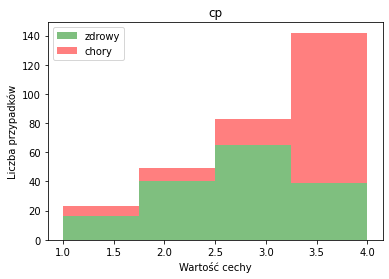

In [43]:
klasa = 'cp'
podzial = 4
x,y = [],[]
zdrowy=cleveland.query("num == -1")[klasa]
chory=cleveland.query("num == 1")[klasa]

plt.hist([zdrowy,chory],podzial, stacked=True, color=['g','r'], alpha=0.5, label=['zdrowy','chory'])
plt.title(klasa)
plt.xlabel('Wartość cechy')
plt.ylabel('Liczba przypadków')
plt.legend()

In [30]:
cleveland.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


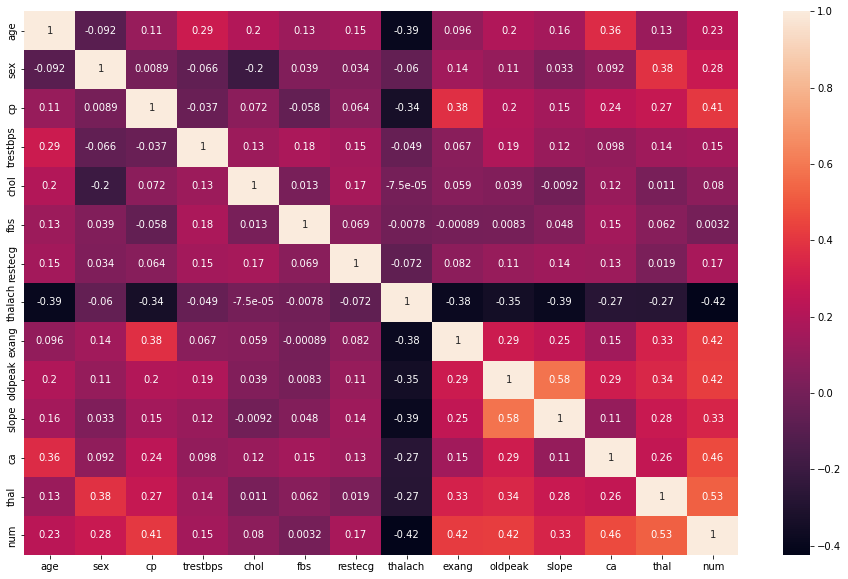

In [31]:
import seaborn as sn
plt.figure(figsize = (16,10))
sn.heatmap(cleveland.corr(),annot=True, )
plt.show()

In [32]:
import math
corr = cleveland.corr()['num']
corr = corr.abs()
corr.sort_values()

fbs         0.003167
chol        0.080285
trestbps    0.153490
restecg     0.166343
age         0.227075
sex         0.278467
slope       0.333049
cp          0.408945
exang       0.421355
thalach     0.423817
oldpeak     0.424052
ca          0.463189
thal        0.526640
num         1.000000
Name: num, dtype: float64

### Część 3



In [33]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

x=cleveland.drop(columns='num')
y= cleveland['num']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

X_train = norm(X_train)
X_test = norm(X_test)
y_train = norm(y_train)
y_test = norm(y_test)

c:\python\python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\python\python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [34]:

model = linear_model.RidgeClassifier()
sfsmodel = sfs(model, n_features_to_select=4)
sfsmodel.fit(X_train,y_train)

sfsmodel.get_feature_names_out()

array(['cp', 'thalach', 'ca', 'thal'], dtype=object)

In [35]:
#sklearn
cle_sk_time = time.time()
for i in range(time_multiplicator):
    cle_sk_ans = linear_model.RidgeClassifier().fit(X_train, y_train)
cle_sk_time = (time.time() - cle_sk_time)/time_multiplicator 

In [36]:
cle_sk_pred = cle_sk_ans.predict(X_test)

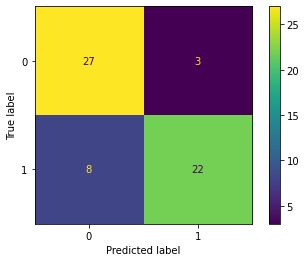

In [37]:
cle_cm=metrics.confusion_matrix(y_test,cle_sk_pred)
cle_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cle_cm)
cle_disp.plot()

In [38]:
#analityczna

cle_my_time = time.time()
for i in range(time_multiplicator):
    cle_my_ans = my_ridge(X_train, y_train, 1e-100)
cle_my_time = (time.time() - cle_my_time)/time_multiplicator 
#[,,,,,]
cle_my_ans = cle_my_ans.to_numpy()



In [39]:
def my_prediction2(theta, XY):
    Y_pred = XY @ theta
    mean = np.mean(Y_pred)
    
    ans = []
    
    for x in Y_pred:
        if x >= 0:
            ans.append(1.0)
        else:
            ans.append(-1)
    
    return np.asarray(ans)

cle_my_pred = my_prediction2(cle_my_ans.reshape(1,len(cle_my_ans)), y_test.to_numpy().reshape(-1,1))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
y_test.to_numpy().reshape(-1,1) @ cle_my_ans.reshape(1,len(cle_my_ans))

In [ ]:
print("Sklearn czułość: ",cle_cm[0][0]/(cle_cm[0][0]+cle_cm[1][0]))
print("Wlasny  czułość: ",my_cm[0][0]/(my_cm[0][0]+my_cm[1][0]))
print()
print("Sklearn specyficzność: ",cle_cm[1][1]/(cle_cm[0][0]+cle_cm[1][1]))
print("Wlasny  specyficzność: ",my_cm[1][1]/(my_cm[0][0]+my_cm[1][1]))
print()
print("Sklearn skuteczność: ",metrics.accuracy_score(cle_sk_pred, y_test))
print("Wlasny  skuteczność: ",metrics.accuracy_score(my_pred, C_test))
print()
print("Sklearn czas: {:f}".format(my_time))
print("Wlasny  czas: {:f}".format(cle_sk_time))

In [9]:
a = np.array([[1, 2, 3],[1, 4, 5]])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [1, 4, 5],
       [4, 5, 6]])